In [1]:
# %pip install pyreadr
# %pip install catboost
# %pip install lckr-jupyterlab-variableinspector


In [2]:
import sklearn 
import os, sys
import pyreadr
import pandas as pd
import catboost
from IPython.display import clear_output


In [3]:
work_dir = '/home/idies/workspace/Storage/hnguye78/persistent/cv_surgery'
exec(open(work_dir+'/code/Python/snippets/helpful_functions.py').read())


In [4]:
import multiprocessing as mp
mp.cpu_count()

20

In [5]:
outcome = 'sts_6d'

In [6]:
load_dir = work_dir+'/csv_files/pre_anat_intra'
feature_space = pd.read_csv(load_dir+'/feature_space_preop_anat_intra_w_interaction_terms.csv') 

In [7]:
feature_space = feature_space.rename(columns={"feature_space.concatid": "concatid"}).drop(['Unnamed: 0'], axis =1)
feature_space.head()

,concatid,proctype,gender,ethnicity,raceasian,raceblack,racecaucasian,raceother,age,heightcm,...,nc_stern.cplegia_ant,nc_stern.cplegia_ret,nc_stern.frepl,nc_stern.inc_revasc,cplegia_ant.cplegia_ret,cplegia_ant.frepl,cplegia_ant.inc_revasc,cplegia_ret.frepl,cplegia_ret.inc_revasc,frepl.inc_revasc
0,10020V313492,2,2,2,2,2,1,2,54.0,155.0,...,2,2,4,4,1,2,2,2,2,4
1,10022V3117559,2,1,2,2,2,1,2,74.0,174.0,...,2,4,4,4,2,2,2,4,4,4
2,10022V315180,6,2,2,2,2,1,2,66.0,157.0,...,2,2,4,2,1,2,1,2,1,2
3,10031V313571,1,2,2,2,2,1,2,79.0,155.5,...,2,2,4,4,1,2,2,2,2,4
4,10047V3420470,1,1,2,2,2,1,2,61.0,170.0,...,4,4,4,4,4,4,4,4,4,4


In [8]:
#label_space = pd.read_csv(smb2.open('//'+work_dir+'/label_space_sts.csv'))
label_space = pd.read_csv(load_dir+'/label_space.csv')

In [9]:
label_space_no_na = label_space.fillna(2)

In [10]:
label_df = label_space_no_na[['concatid', outcome]].drop_duplicates(subset='concatid', keep="last")

In [11]:
label_df.head()

,concatid,sts_6d
0,10020V313492,2.0
1,10022V3117559,2.0
2,10022V315180,1.0
3,10031V313571,2.0
4,10047V3420470,2.0


In [12]:
data = pd.merge(label_df, feature_space.drop_duplicates(subset='concatid', keep="last")
                , how='left', on='concatid', left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

In [13]:
data_full = data
data = data_full.drop(['concatid'], axis = 1)

In [14]:
data

,sts_6d,proctype,gender,ethnicity,raceasian,raceblack,racecaucasian,raceother,age,heightcm,...,nc_stern.cplegia_ant,nc_stern.cplegia_ret,nc_stern.frepl,nc_stern.inc_revasc,cplegia_ant.cplegia_ret,cplegia_ant.frepl,cplegia_ant.inc_revasc,cplegia_ret.frepl,cplegia_ret.inc_revasc,frepl.inc_revasc
0,2.0,2,2,2,2,2,1,2,54.0,155.0,...,2,2,4,4,1,2,2,2,2,4
1,2.0,2,1,2,2,2,1,2,74.0,174.0,...,2,4,4,4,2,2,2,4,4,4
2,1.0,6,2,2,2,2,1,2,66.0,157.0,...,2,2,4,2,1,2,1,2,1,2
3,2.0,1,2,2,2,2,1,2,79.0,155.5,...,2,2,4,4,1,2,2,2,2,4
4,2.0,1,1,2,2,2,1,2,61.0,170.0,...,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34556,2.0,7,1,2,2,2,1,2,81.0,178.1,...,2,4,4,4,2,2,2,4,4,4
34557,1.0,2,1,2,2,2,1,2,66.0,191.0,...,2,4,4,4,2,2,2,4,4,4
34558,1.0,2,1,2,2,2,1,2,82.0,188.0,...,4,4,4,4,4,4,4,4,4,4
34559,2.0,2,1,2,2,2,1,2,55.0,185.0,...,2,4,4,4,2,2,2,4,4,4


In [15]:
data_full.shape

(34561, 15756)

In [16]:
name_list = list(feature_space)


In [17]:
data.rename(columns={outcome: 'label'}, inplace=True)

In [18]:
# change label: 2 (alive) to 0 (class 0)
data.loc[data.label ==2, 'label'] = 0

In [19]:
data['label'].value_counts()


0.0    25378
1.0     9183
Name: label, dtype: int64

In [20]:
# Split train set/test set in stratified fashion, then downsample training set to balance outcome class:
from sklearn import model_selection
outercv = sklearn.model_selection.StratifiedKFold(n_splits=10,shuffle=True,random_state= 1)
X = data.drop(['label'],axis =1).values
y = data[['label']].values

for train_index, test_index in outercv.split(X, y):
    # print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

train_df = data.iloc[train_index]
test_df = data.iloc[test_index]
train_df_majority = train_df[train_df['label']==0]
train_df_minority = train_df[train_df['label']==1]

# Downsampling:
from sklearn.utils import resample
train_df_majority_downsampled = resample(train_df_majority, 
                                 replace=False,     # sample without replacement
                                 n_samples=2*train_df_minority.shape[0],    # to match minority class
                                 random_state=1)

df_downsampled = pd.concat([train_df_majority_downsampled, train_df_minority])

In [21]:
# y_test: 1 = dead, 2 = live. Convert live to class 0:

import numpy as np
np.array(np.unique(y_test, return_counts=True)).T
y_test[y_test == 2] = 0
y_train[y_train == 2] = 0
np.array(np.unique(y_test, return_counts=True)).T


array([[0.000e+00, 2.537e+03],
       [1.000e+00, 9.190e+02]])

In [22]:
# Split the training set further to cv_train-validation set, using stratified k-fold cv: 10-fold x 5 times
# train and calibrate models
from sklearn import model_selection
outercv = sklearn.model_selection.RepeatedStratifiedKFold(n_splits=5, n_repeats = 2,random_state= 1)

# initialize:
cv_performance_df = pd.DataFrame()
cv_performance_isotonic_df = pd.DataFrame()
cv_performance_sigmoid_df = pd.DataFrame()
training_bs_testset_pred_df = data_full[['concatid',outcome]].loc[test_index,:].rename(columns={outcome: 'label'})
training_bs_testset_pred_calibrated_isotonic_df = training_bs_testset_pred_df.copy(deep = True)
training_bs_testset_pred_calibrated_sigmoid_df = training_bs_testset_pred_df.copy(deep = True)

fold = 1
for cv_train_index, cv_test_index in outercv.split(X_train, y_train):
    print("Fold "+ str(fold) + "....")
    fold = fold + 1
    
    # print("TRAIN:", train_index, "TEST:", test_index)
    cv_X_train, cv_X_test = X_train[cv_train_index], X_train[cv_test_index]
    cv_y_train, cv_y_test = y_train[cv_train_index], y_train[cv_test_index]
    
    cv_train_df = data.iloc[cv_train_index]
    cv_test_df = data.iloc[cv_test_index]
    cv_train_df_majority = cv_train_df[cv_train_df['label']==0]
    cv_train_df_minority = cv_train_df[cv_train_df['label']==1]

    # Downsampling:
    from sklearn.utils import resample
    cv_train_df_majority_downsampled = resample(cv_train_df_majority, 
                                     replace=False,     # sample without replacement
                                     n_samples=2*cv_train_df_minority.shape[0],    # to match minority class
                                     random_state=1)

    # Combine downsampled majority class with minority class
    cv_df_downsampled = pd.concat([cv_train_df_majority_downsampled, cv_train_df_minority])
    cv_X_train_downsampled = cv_df_downsampled.drop(['label'],axis =1)
    cv_y_train_downsampled = cv_df_downsampled['label'].ravel()
    
    
    # Train model:
    from catboost import CatBoostClassifier
    cv_cb_downsampled =  CatBoostClassifier(random_state = 1)
    cv_cb_downsampled.fit(cv_X_train_downsampled, cv_y_train_downsampled, verbose = False)
    clear_output()


    
    # Evaluate model on cv_test_set (validation set):
    cv_y_test_predict_proba_cb_downsampled = cv_cb_downsampled.predict_proba(cv_X_test)[:, 1]
    performance_metrics = performance_wo_figure(cv_y_test, cv_y_test_predict_proba_cb_downsampled, thres = 0.5)
    cv_performance_df = cv_performance_df.append(performance_metrics, ignore_index=True)
    
    
    # Pred prob of model on holdout testset:
    training_bs_testset_pred_df['time_'+str(fold-1)] = cv_cb_downsampled.predict_proba(X_test)[:, 1]
    
    
    
    
    # calibrate model, record performance metric validation set, and pred prob on holdout testset:
    cv_cb_downsampled_isotonic_on_cv = calibrate_model(cv_cb_downsampled, cv_X_train, cv_y_train.ravel(), method = 'isotonic')
    clear_output()
    training_bs_testset_pred_calibrated_isotonic_df['time_'+str(fold-1)] = cv_cb_downsampled_isotonic_on_cv.predict_proba(X_test)[:, 1]

    cv_y_test_predict_proba_cb_downsampled_isotonic = cv_cb_downsampled_isotonic_on_cv.predict_proba(cv_X_test)[:, 1]
    clear_output()
    performance_metrics_isotonic = performance_wo_figure(cv_y_test, cv_y_test_predict_proba_cb_downsampled_isotonic, thres = 0.5)
    cv_performance_isotonic_df = cv_performance_isotonic_df.append(performance_metrics_isotonic, ignore_index=True)

    
    cv_cb_downsampled_sigmoid_on_cv = calibrate_model(cv_cb_downsampled, cv_X_train, cv_y_train.ravel(), method = 'sigmoid')
    clear_output()

    training_bs_testset_pred_calibrated_sigmoid_df['time_'+str(fold-1)] = cv_cb_downsampled_sigmoid_on_cv.predict_proba(X_test)[:, 1]
    
    cv_y_test_predict_proba_cb_downsampled_sigmoid = cv_cb_downsampled_sigmoid_on_cv.predict_proba(cv_X_test)[:, 1]
    performance_metrics_sigmoid = performance_wo_figure(cv_y_test, cv_y_test_predict_proba_cb_downsampled_sigmoid, thres = 0.5)
    cv_performance_sigmoid_df = cv_performance_sigmoid_df.append(performance_metrics_sigmoid, ignore_index=True)
    
    clear_output()


In [23]:
training_bs_testset_pred_df.to_csv(load_dir+'/'+'patient_specific_pred_prob_testset_' + outcome +'.csv', index=False)
training_bs_testset_pred_calibrated_isotonic_df.to_csv(load_dir+'/'+'patient_specific_pred_prob_testset_isotonic_on_cv_' + outcome +'.csv', index=False)
training_bs_testset_pred_calibrated_sigmoid_df.to_csv(load_dir+'/'+'patient_specific_pred_prob_testset_sigmoid_on_cv_' + outcome +'.csv', index=False)


In [24]:
cv_performance_df.to_csv(load_dir+'/'+'cv_performance_df_' + outcome +'.csv', index=False)
cv_performance_df.describe(percentiles = [.025, .5, .975]).round(decimals = 3)


,ARC,AUROC,Brier,F1,accuracy,precision,recall,sens,spec
count,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000
mean,0.816,0.924,0.100,0.756,0.869,0.745,0.767,0.767,0.905
std,0.011,0.004,0.003,0.009,0.005,0.012,0.007,0.007,0.006
min,0.792,0.916,0.097,0.740,0.859,0.725,0.754,0.754,0.896
2.5%,0.794,0.916,0.097,0.740,0.859,0.726,0.755,0.755,0.896
50%,0.819,0.925,0.099,0.759,0.870,0.747,0.769,0.769,0.905
97.5%,0.827,0.929,0.105,0.767,0.875,0.761,0.776,0.776,0.912
max,0.827,0.929,0.105,0.768,0.876,0.762,0.777,0.777,0.912


In [25]:
# print out performance:
print_cv_performance = pd.DataFrame(cv_performance_df[['AUROC', 'accuracy', 'ARC', 'Brier', 'F1','precision','recall', 'sens', 'spec']].apply(lambda x: report_metric(x), axis = 0)).transpose()

print_cv_performance.to_csv(load_dir+'/'+'print_cv_performance_' + outcome +'.csv', index=False)
print_cv_performance

,AUROC,accuracy,ARC,Brier,F1,precision,recall,sens,spec
0,"0.925 (0.916, 0.929)","0.87 (0.859, 0.875)","0.819 (0.794, 0.827)","0.099 (0.097, 0.105)","0.759 (0.74, 0.767)","0.747 (0.726, 0.761)","0.769 (0.755, 0.776)","0.769 (0.755, 0.776)","0.905 (0.896, 0.912)"


In [26]:
cv_performance_isotonic_df.to_csv(load_dir+'/'+'cv_performance_isotonic_df_' + outcome +'.csv', index=False)
print_cv_performance_isotonic = pd.DataFrame(cv_performance_isotonic_df[['AUROC', 'accuracy', 'ARC', 'Brier', 'F1','precision','recall', 'sens', 'spec']].apply(lambda x: report_metric(x), axis = 0)).transpose()
print_cv_performance_isotonic.to_csv(load_dir+'/'+'print_cv_performance_isotonic_' + outcome +'.csv', index=False)
print_cv_performance_isotonic

,AUROC,accuracy,ARC,Brier,F1,precision,recall,sens,spec
0,"0.853 (0.843, 0.86)","0.807 (0.796, 0.812)","0.673 (0.653, 0.688)","0.135 (0.134, 0.139)","0.561 (0.539, 0.573)","0.706 (0.673, 0.734)","0.464 (0.444, 0.49)","0.464 (0.444, 0.49)","0.929 (0.917, 0.94)"


In [27]:
cv_performance_sigmoid_df.to_csv(load_dir+'/'+'cv_performance_sigmoid_df_' + outcome +'.csv', index=False)
print_cv_performance_sigmoid = pd.DataFrame(cv_performance_sigmoid_df[['AUROC', 'accuracy', 'ARC', 'Brier', 'F1','precision','recall', 'sens', 'spec']].apply(lambda x: report_metric(x), axis = 0)).transpose()
print_cv_performance_sigmoid.to_csv(load_dir+'/'+'print_cv_performance_sigmoid_' + outcome +'.csv', index=False)
print_cv_performance_sigmoid

,AUROC,accuracy,ARC,Brier,F1,precision,recall,sens,spec
0,"0.854 (0.843, 0.86)","0.806 (0.796, 0.811)","0.674 (0.654, 0.688)","0.136 (0.135, 0.14)","0.548 (0.528, 0.557)","0.716 (0.685, 0.744)","0.44 (0.426, 0.455)","0.44 (0.426, 0.455)","0.936 (0.929, 0.946)"


In [28]:
# Save models:
import pickle
pickle.dump(cv_cb_downsampled, open(work_dir+'/models/pre_anat_intra/'+'model_' +outcome + '_cv_cb_downsampled.sav', 'wb'))
pickle.dump(cv_cb_downsampled_isotonic_on_cv, open(work_dir+'/models/pre_anat_intra/'+'model_' +outcome + '_cv_cb_downsampled_isotonic_calibration_on_cv.sav', 'wb'))
pickle.dump(cv_cb_downsampled_sigmoid_on_cv, open(work_dir+'/models/pre_anat_intra/'+'model_' +outcome + '_cv_cb_downsampled_isotonic_calibration_on_cv.sav', 'wb'))


In [29]:
# Variable Importance:

feature_imp_df = cv_cb_downsampled.get_feature_importance(prettified = True)
feature_imp_df_sort = feature_imp_df.sort_values(by='Importances', ascending=False, inplace=False, kind='quicksort', na_position='last')
feature_imp_df_sort.to_csv(load_dir+'/'+'feature_imp_df_sort_'+outcome+'.csv', index=False)

decouple_var_imp_sort = decouple_var_imp(feature_imp_df_sort)
decouple_var_imp_sort.to_csv(load_dir+'/'+'decouple_var_imp_sort_'+outcome+'.csv', index=False)
decouple_var_imp_sort.iloc[:10,:]

/home/idies/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Feature Id,total_importance,min_max_scale_importance
4,status,10.038214,1.000000
9,medacoag,5.884710,0.585575
2,age,5.640669,0.561225
3,perfustm,5.528032,0.549987
84,lwsttemp,4.528691,0.450275
26,totalbumin,4.527729,0.450179
47,ppef,4.130574,0.410552
0,meldscr,4.050724,0.402585
10,creatlst,3.511645,0.348797
25,hct,3.423126,0.339965


In [30]:
# Bootstrap testset:
bs_testset_performance_df = pd.DataFrame()
bs_testset_performance_isotonic_df = pd.DataFrame()
bs_testset_performance_sigmoid_df = pd.DataFrame()
for i in range(100):
    sample_indices = np.random.randint(len(X_test), size=len(X_test))
    bs_y_test = y_test[sample_indices]
    bs_X_test = X_test[sample_indices,:]
    
    bs_y_test_predict_proba_cb_downsampled = cv_cb_downsampled.predict_proba(bs_X_test)[:, 1]
    bs_performance_metrics = performance_wo_figure(bs_y_test, bs_y_test_predict_proba_cb_downsampled, thres = 0.5)
    bs_testset_performance_df = bs_testset_performance_df.append(bs_performance_metrics, ignore_index=True)

    
    bs_y_test_predict_proba_cb_downsampled_isotonic = cv_cb_downsampled_isotonic_on_cv.predict_proba(bs_X_test)[:, 1]
    bs_performance_metrics_isotonic = performance_wo_figure(bs_y_test, bs_y_test_predict_proba_cb_downsampled_isotonic, thres = 0.5)
    bs_testset_performance_isotonic_df = bs_testset_performance_isotonic_df.append(bs_performance_metrics_isotonic, ignore_index=True)
    
    bs_y_test_predict_proba_cb_downsampled_sigmoid = cv_cb_downsampled_sigmoid_on_cv.predict_proba(bs_X_test)[:, 1]
    bs_performance_metrics_sigmoid = performance_wo_figure(bs_y_test, bs_y_test_predict_proba_cb_downsampled_sigmoid, thres = 0.5)
    bs_testset_performance_sigmoid_df = bs_testset_performance_sigmoid_df.append(bs_performance_metrics_sigmoid, ignore_index=True)

In [31]:
bs_testset_performance_df.to_csv(load_dir+'/'+'bs_testset_performance_df_' + outcome +'.csv', index=False)
bs_testset_performance_isotonic_df.to_csv(load_dir+'/'+'bs_testset_performance_isotonic_df_' + outcome +'.csv', index=False)
bs_testset_performance_sigmoid_df.to_csv(load_dir+'/'+'bs_testset_performance_sigmoid_df_' + outcome +'.csv', index=False)

In [32]:
bs_testset_performance_df.describe(percentiles = [.025, .5, .975]).round(decimals = 3)

,ARC,AUROC,Brier,F1,accuracy,precision,recall,sens,spec
count,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000
mean,0.801,0.915,0.106,0.730,0.854,0.718,0.743,0.743,0.895
std,0.014,0.005,0.003,0.012,0.006,0.015,0.012,0.012,0.006
min,0.759,0.905,0.098,0.697,0.839,0.686,0.699,0.699,0.879
2.5%,0.766,0.906,0.100,0.709,0.843,0.693,0.721,0.721,0.883
50%,0.801,0.915,0.106,0.730,0.855,0.720,0.745,0.745,0.895
97.5%,0.825,0.923,0.110,0.753,0.865,0.745,0.764,0.764,0.905
max,0.836,0.929,0.111,0.763,0.873,0.759,0.768,0.768,0.911


In [33]:
# print out performance:
print_bs_testset_performance = pd.DataFrame(bs_testset_performance_df[['AUROC', 'accuracy', 'ARC', 'Brier', 'F1','precision','recall', 'sens', 'spec']].apply(lambda x: report_metric(x), axis = 0)).transpose()
print_bs_testset_performance.to_csv(load_dir+'/'+'print_bs_testset_performance_' + outcome +'.csv', index=False)
print_bs_testset_performance

,AUROC,accuracy,ARC,Brier,F1,precision,recall,sens,spec
0,"0.915 (0.906, 0.923)","0.855 (0.843, 0.865)","0.801 (0.766, 0.825)","0.106 (0.1, 0.11)","0.73 (0.709, 0.753)","0.72 (0.693, 0.745)","0.745 (0.721, 0.764)","0.745 (0.721, 0.764)","0.895 (0.883, 0.905)"


In [34]:
# print out performance:
print_bs_testset_performance_isotonic = pd.DataFrame(bs_testset_performance_isotonic_df[['AUROC', 'accuracy', 'ARC', 'Brier', 'F1','precision','recall', 'sens', 'spec']].apply(lambda x: report_metric(x), axis = 0)).transpose()
print_bs_testset_performance_isotonic.to_csv(load_dir+'/'+'print_bs_testset_performance_isotonic_' + outcome +'.csv', index=False)
print_bs_testset_performance_isotonic

,AUROC,accuracy,ARC,Brier,F1,precision,recall,sens,spec
0,"0.84 (0.828, 0.855)","0.799 (0.787, 0.811)","0.66 (0.618, 0.693)","0.14 (0.133, 0.146)","0.547 (0.521, 0.573)","0.682 (0.643, 0.723)","0.458 (0.428, 0.485)","0.458 (0.428, 0.485)","0.923 (0.912, 0.932)"


In [35]:
# print out performance:
print_bs_testset_performance_sigmoid = pd.DataFrame(bs_testset_performance_sigmoid_df[['AUROC', 'accuracy', 'ARC', 'Brier', 'F1','precision','recall', 'sens', 'spec']].apply(lambda x: report_metric(x), axis = 0)).transpose()
print_bs_testset_performance_sigmoid.to_csv(load_dir+'/'+'print_bs_testset_performance_isotonic_' + outcome +'.csv', index=False)
print_bs_testset_performance_sigmoid

,AUROC,accuracy,ARC,Brier,F1,precision,recall,sens,spec
0,"0.841 (0.828, 0.854)","0.8 (0.787, 0.812)","0.66 (0.62, 0.696)","0.14 (0.133, 0.146)","0.536 (0.504, 0.562)","0.697 (0.66, 0.737)","0.433 (0.403, 0.461)","0.433 (0.403, 0.461)","0.932 (0.923, 0.941)"


	Brier: 0.107
	AUC: 0.910
	arc: 0.789

	Accuracy at threshold: 0.854
	Precision at threshold: 0.696
	Recall at threshold: 0.747
	F1 at threshold: 0.721
	Sensitivity at threshold: 0.747
	Specificity at threshold: 0.890


[[2302  284]
 [ 220  650]]


              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90      2586
         1.0       0.70      0.75      0.72       870

    accuracy                           0.85      3456
   macro avg       0.80      0.82      0.81      3456
weighted avg       0.86      0.85      0.86      3456





{'AUROC': 0.9104541696669066,
 'accuracy': 0.8541666666666666,
 'ARC': 0.7886466056997025,
 'Brier': 0.10702766569180058,
 'F1': 0.7206208425720622,
 'precision': 0.69593147751606,
 'recall': 0.7471264367816092,
 'sens': 0.7471264367816092,
 'spec': 0.8901778808971385}

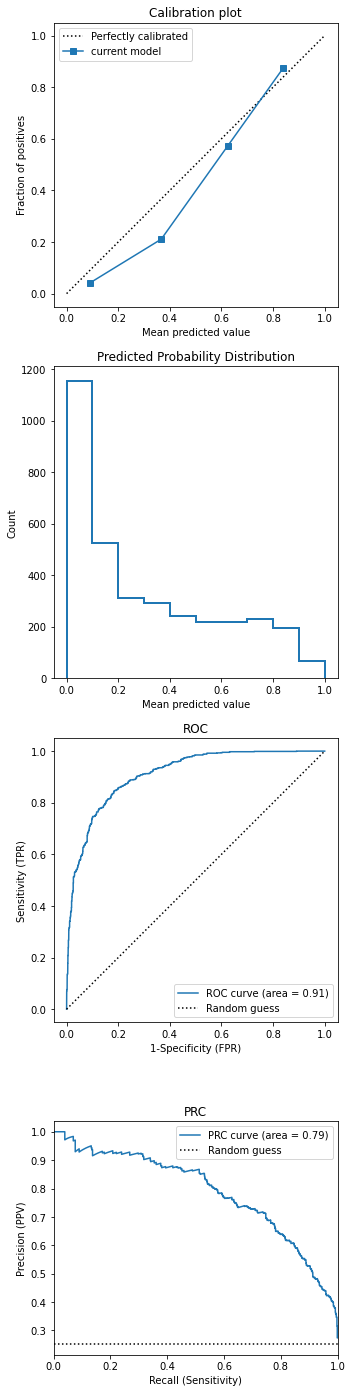

In [36]:
# Plot performance figures:
performance(bs_y_test, bs_y_test_predict_proba_cb_downsampled, thres = 0.5)

In [37]:
# import matplotlib as plt
# plt.rcParams["figure.figsize"] = (12,7)
# ax = feature_imp_df_sort.plot('Feature', 'Score', kind='bar', color='c')
# ax.set_title("Feature Importance using Permutation method", fontsize = 14)
# ax.set_xlabel("features")


In [38]:
# # Train and calibrate model on entirety of the training set:

# X_train_downsampled = df_downsampled.drop(['label'],axis =1)
# y_train_downsampled = df_downsampled['label'].ravel()
# from catboost import CatBoostClassifier
# cb_downsampled =  CatBoostClassifier(random_state = 1)
# cb_downsampled.fit(X_train_downsampled, y_train_downsampled, cat_features = np.array(get_cat_features(X_train_downsampled, 5)), verbose = False)
# pickle.dump(cb_downsampled, open('model_' +outcome + '_cb_downsampled.sav', 'wb'))

# # Create a corrected classifier. - Isotonic calibration
# cb_downsampled_iso = sklearn.calibration.CalibratedClassifierCV(cb_downsampled, cv=10, method='isotonic')
# cb_downsampled_iso.fit(X_train_downsampled, y_train_downsampled.ravel())

# pickle.dump(cb_downsampled_iso, open('model_' +outcome + '_cb_downsampled_iso.sav', 'wb'))

# cb_downsampled_sigmoid = sklearn.calibration.CalibratedClassifierCV(cb_downsampled, cv=10, method='sigmoid')
# cb_downsampled_sigmoid.fit(X_train_downsampled, y_train_downsampled.ravel())
# pickle.dump(cb_downsampled_sigmoid, open('model_' +outcome + '_cb_downsampled_sigmoid.sav', 'wb'))

# # loaded_model = pickle.load(open('model_' +outcome + '_cb_downsampled_iso.sav', 'rb'))
# # y_test_predict_proba_loaded_model = loaded_model.predict_proba(X_test)[:, 1]

# # # Bootstrap testset:
# # bs_testset_performance_df = pd.DataFrame()
# # for i in range(10):
# #     sample_indices = np.random.randint(len(X_test), size=len(X_test))
# #     bs_y_test = y_test[sample_indices]
# #     bs_X_test = X_test[sample_indices,:]
# #     bs_y_test_predict_proba_cb_downsampled_iso = cb_downsampled_iso.predict_proba(bs_X_test)[:, 1]
# #     bs_performance_metrics = performance(bs_y_test, bs_y_test_predict_proba_cb_downsampled_iso, thres = 0.5)
# #     bs_testset_performance_df = bs_testset_performance_df.append(bs_performance_metrics, ignore_index=True)


In [39]:
# # Bootstrap testset and spit prediction using calibrated model:
# import pickle
# import sklearn
# iso_model = pickle.load(open('model_' +outcome + '_cb_downsampled_iso.sav', 'rb'))

# bs_testset_pred_df = pd.DataFrame(list(zip(data_full['concatid'][test_index], test_index)),
#                                 columns=['concatid', 'index'])
# bs_testset_performance_iso_df = pd.DataFrame()
# for i in range(10):
#     sample_indices = np.random.randint(len(X_test), size=len(X_test))
#     bs_y_test = y_test[sample_indices]
#     bs_X_test = X_test[sample_indices,:]
#     bs_y_test_predict_proba_cb_downsampled_iso = iso_model.predict_proba(bs_X_test)[:, 1]
#     bs_performance_metrics = performance_wo_figure(bs_y_test, bs_y_test_predict_proba_cb_downsampled_iso, thres = 0.5)
#     bs_testset_performance_iso_df = bs_testset_performance_iso_df.append(bs_performance_metrics, ignore_index=True)


In [40]:
# bs_testset_performance_iso_df

In [41]:
# iso_model = pickle.load(open('model_' +outcome + '_cb_downsampled_iso.sav', 'rb'))
# y_test_predict_proba_cb_downsampled_iso = iso_model.predict_proba(X_test)[:, 1]
# testset_iso_pred_df = pd.DataFrame(list(zip(y_test, y_test_predict_proba_cb_downsampled_iso)),
#                                 columns=['label', 'pred'])
# testset_iso_pred_df.to_csv(load_dir+'/'+'pred_prob_testset_iso_' + outcome +'.csv', index=False)

In [42]:
# before_iso_model = pickle.load(open('model_' +outcome + '_cv_cb_downsampled.sav', 'rb'))
# y_test_predict_proba_cb_downsampled = before_iso_model.predict_proba(X_test)[:, 1]
# testset_pred_df = pd.DataFrame(list(zip(y_test, y_test_predict_proba_cb_downsampled)),
#                                 columns=['label', 'pred'])
# testset_pred_df.to_csv(load_dir+'/'+'pred_prob_testset_before_iso_' + outcome +'.csv', index=False)

In [43]:
# import pickle
# from sklearn import calibration
# cv_cb_downsampled = pickle.load(open('model_' +outcome + '_cv_cb_downsampled.sav', 'rb'))
# cv_cb_downsampled_sigmoid = sklearn.calibration.CalibratedClassifierCV(cv_cb_downsampled, cv=10, method='sigmoid')
# cv_cb_downsampled_sigmoid.fit(X_train, y_train.ravel())
# pickle.dump(cv_cb_downsampled_sigmoid, open('model_' +outcome + '_cv_cb_downsampled_sigmoid.sav', 'wb'))


In [44]:
# cv_sigmoid_model = pickle.load(open('model_' +outcome + '_cv_cb_downsampled_sigmoid.sav', 'rb'))
# y_test_predict_proba_cb_downsampled = cv_sigmoid_model.predict_proba(X_test)[:, 1]
# testset_pred_df = pd.DataFrame(list(zip(y_test, y_test_predict_proba_cb_downsampled)),
#                                 columns=['label', 'pred'])
# testset_pred_df.to_csv(load_dir+'/'+'pred_prob_testset_sigmoid_' + outcome +'.csv', index=False)

In [45]:
# import pickle
# from sklearn import calibration
# cv_cb_downsampled = pickle.load(open('model_' +outcome + '_cv_cb_downsampled.sav', 'rb'))
# cv_cb_downsampled_isotonic = sklearn.calibration.CalibratedClassifierCV(cv_cb_downsampled, cv=10, method='isotonic')
# cv_cb_downsampled_isotonic.fit(X_train, y_train.ravel())
# pickle.dump(cv_cb_downsampled_isotonic, open('model_' +outcome + '_cv_cb_downsampled_isotonic.sav', 'wb'))
# cv_isotonic_model = pickle.load(open('model_' +outcome + '_cv_cb_downsampled_isotonic.sav', 'rb'))
# y_test_predict_proba_cb_downsampled = cv_isotonic_model.predict_proba(X_test)[:, 1]
# testset_pred_df = pd.DataFrame(list(zip(y_test, y_test_predict_proba_cb_downsampled)),
#                                 columns=['label', 'pred'])
# testset_pred_df.to_csv(load_dir+'/'+'pred_prob_testset_isotonic_' + outcome +'.csv', index=False)


In [46]:
# import pickle
# from sklearn import calibration
# cv_cb_downsampled = pickle.load(open('model_' +outcome + '_cv_cb_downsampled.sav', 'rb'))
# cv_cb_downsampled_isotonic_on_db = sklearn.calibration.CalibratedClassifierCV(cv_cb_downsampled, cv=10, method='isotonic')
# X_train_downsampled = df_downsampled.drop(['label'],axis =1)
# y_train_downsampled = df_downsampled['label'].ravel()
# cv_cb_downsampled_isotonic_on_db.fit(X_train_downsampled, y_train_downsampled.ravel())
# pickle.dump(cv_cb_downsampled_isotonic_on_db, open('model_' +outcome + '_cv_cb_downsampled_isotonic_on_db.sav', 'wb'))
# cv_isotonic_model_on_db = pickle.load(open('model_' +outcome + '_cv_cb_downsampled_isotonic_on_db.sav', 'rb'))
# y_test_predict_proba_cb_downsampled = cv_isotonic_model_on_db.predict_proba(X_test)[:, 1]
# testset_pred_df = pd.DataFrame(list(zip(y_test, y_test_predict_proba_cb_downsampled)),
#                                 columns=['label', 'pred'])
# testset_pred_df.to_csv(load_dir+'/'+'pred_prob_testset_isotonic_on_db_' + outcome +'.csv', index=False)


In [47]:
# import pickle
# from sklearn import calibration
# cv_cb_downsampled = pickle.load(open('model_' +outcome + '_cv_cb_downsampled.sav', 'rb'))
# cv_cb_downsampled_isotonic_on_cv = sklearn.calibration.CalibratedClassifierCV(cv_cb_downsampled, cv=10, method='isotonic')
# cv_cb_downsampled_isotonic_on_cv.fit(cv_X_train, cv_y_train.ravel())
# pickle.dump(cv_cb_downsampled_isotonic_on_cv, open('model_' +outcome + '_cv_cb_downsampled_isotonic_on_cv.sav', 'wb'))
# cv_isotonic_model_on_cv = pickle.load(open('model_' +outcome + '_cv_cb_downsampled_isotonic_on_cv.sav', 'rb'))
# y_test_predict_proba_cb_downsampled = cv_isotonic_model_on_cv.predict_proba(X_test)[:, 1]
# testset_pred_df = pd.DataFrame(list(zip(y_test, y_test_predict_proba_cb_downsampled)),
#                                 columns=['label', 'pred'])
# testset_pred_df.to_csv(load_dir+'/'+'pred_prob_testset_isotonic_on_cv_' + outcome +'.csv', index=False)


### Holdout testset feature space and sts_pred_prob filter:


In [48]:

# testset_df = data_full.iloc[test_index,:]
# testset_df.to_csv(load_dir+'/'+'testset_feature_df_' + outcome +'.csv', index=True)
# # load sts pred prob and filter only patients in the holdout test set:
# load_dir = '/home/idies/workspace/Storage/hnguye78/persistent'+'/csv_files'
# sts_pred_prob_df = pd.read_csv(load_dir+'/sts_pred_prob.csv')
# sts_pred_prob_df['concatid'] = sts_pred_prob_df['patid']+sts_pred_prob_df['recordid']
# sts_pred_prob_df_rm_dups = sts_pred_prob_df.drop_duplicates(subset='concatid', keep="last")
# sts_pred_prob_testset = sts_pred_prob_df_rm_dups.loc[sts_pred_prob_df_rm_dups['concatid'].isin(testset_df['concatid']),['concatid', 'predvent']]

# sts_pred_prob_testset.to_csv(load_dir+'/'+'sts_pred_prob_testset_' + outcome +'.csv', index=False)
# # # check to make sure the concatid in sts_pred_prob and in the testset are the same: 
# print(sorted(list(sts_pred_prob_testset['concatid'])) == sorted(list(testset_df['concatid'])))
# # # True

### Predicted Probability of Patients in Non-STS Set:

In [49]:
# load_dir = '/home/idies/workspace/Storage/hnguye78/persistent'+'/csv_files'
# feature_space_non_sts_patients = pd.read_csv(load_dir+'/non_sts_patients_feature_space.csv')
# X_non_sts = feature_space_non_sts_patients.drop(['label','Unnamed: 0', 'concatid'], axis = 1).values
# import pickle
# import sklearn
# loaded_model = pickle.load(open('model_' +outcome + '_cv_cb_downsampled.sav', 'rb'))
# y_non_sts_predict_proba = loaded_model.predict_proba(X_non_sts)[:, 1]

# prob_risk_non_sts_df = pd.DataFrame(list(zip(feature_space_non_sts_patients['concatid'], y_non_sts_predict_proba)),
#                                 columns=['concatid', 'predicted_prob'])
# prob_risk_non_sts_df.to_csv(load_dir+'/'+'pred_prob_non_sts_patients_df_' + outcome +'.csv', index=False)
# # # check to see that the non_sts set does not overlap with the testset concatid 
# # set((prob_risk_non_sts_df['concatid'])).intersection((set(testset_df['concatid'])))
# # # no overlap